In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.regularizers import l2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
import os

In [14]:
dataDir = '..\data'
data = pd.read_csv('..\data\drivingRecords.csv')
data.head()

,frame_id,steering_angle
0,1479425441182877835,-0.373665
1,1479425441232704425,-0.065396
2,1479425441282730750,-0.160735
3,1479425441332806714,0.317896
4,1479425441382790272,0.196493


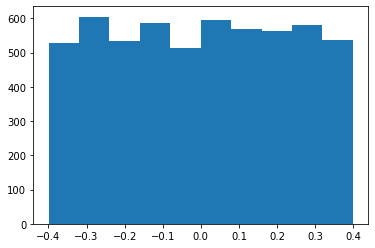

In [15]:
#It is balanced
plt.hist(data['steering_angle'])
plt.show()

In [16]:
def load_image(dataDir, data):
    image = []
    steering = []
    for i in range(len(data)):
        center = (str(data.frame_id[i]) + '.jpg')
        image.append(os.path.join(dataDir, center))
        steering.append(float(data.steering_angle[i]))
    images = np.asarray(image)
    steerings = np.asarray(steering)
    return images, steerings
        
images, steerings = load_image(dataDir + '\IMG', data)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(images, steerings, test_size = 0.2, random_state = 8)

In [18]:
print(len(X_train))
print(len(X_valid))

4491
1123


In [19]:
X_valid.shape

(1123,)

In [20]:
X_train.shape

(4491,)

Text(0.5, 1.0, 'Validation Set')

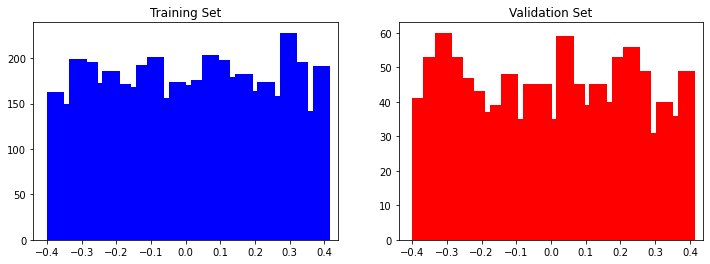

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (12,4))
axes[0].hist(y_train, bins = 25, width = 0.05, color = 'blue')
axes[0].set_title('Training Set')
axes[1].hist(y_valid, bins = 25, width = 0.05, color = 'red')
axes[1].set_title('Validation Set')


In [22]:
def imagePreprocess(image):
    image = mpimg.imread(image)
    image = image[250:460,: ,:]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (3,3), 0)
    image = cv2.resize(image, (200,66))
    image = image/255
    return image

Text(0.5, 1.0, 'Preprocessed Image')

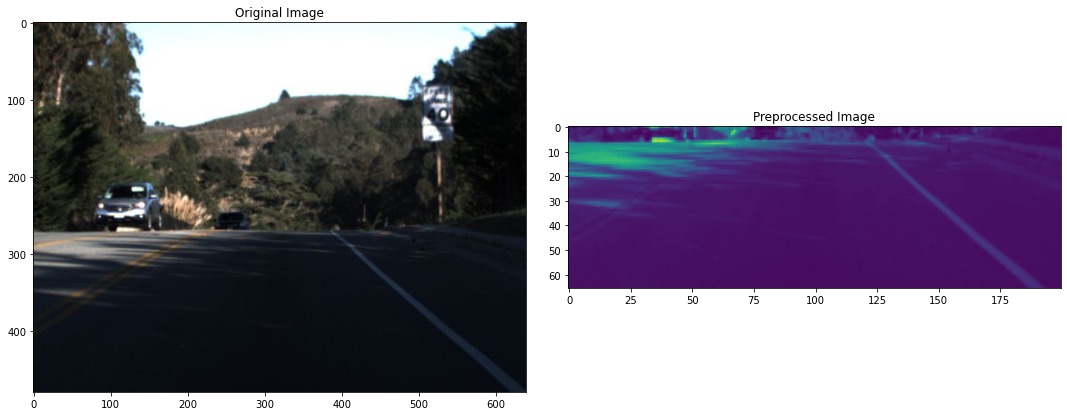

In [23]:
image = images[200]
originalImage = mpimg.imread(image)
preprocessedImage = imagePreprocess(image)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(originalImage)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessedImage)
axs[1].set_title('Preprocessed Image')

In [24]:
X_train = np.array(list(map(imagePreprocess, X_train)))

In [25]:
X_valid = np.array(list(map(imagePreprocess, X_valid)))

(4491, 66, 200)


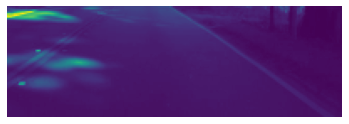

In [26]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

(1123, 66, 200)


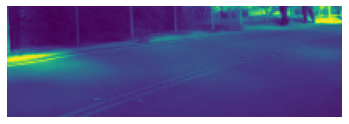

In [27]:
plt.imshow(X_valid[random.randint(0, len(X_valid)-1)])
plt.axis('off')
print(X_valid.shape)

In [44]:
def modelForImages():
 
    model = Sequential()
 
    model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,1),activation='sigmoid'))
 
    model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), kernel_regularizer=l2(0.005), bias_regularizer=l2(0.005), activation='sigmoid'))
    
    model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), kernel_regularizer=l2(0.005), bias_regularizer=l2(0.005), activation='sigmoid'))
    
    model.add(Conv2D(64, kernel_size=(3,3), activation='sigmoid'))
    
    model.add(Conv2D(64, kernel_size=(3,3), activation='sigmoid'))
    
    model.add(Dropout(0.5))
 
 
    model.add(Flatten())
    
    model.add(Dense(100, activation='sigmoid'))
    
    model.add(Dropout(0.5))
 
 
    model.add(Dense(50, activation='sigmoid'))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation ='sigmoid'))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(1))
 
 
    optimizer= Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
 
    return model

In [45]:
model = modelForImages()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 31, 98, 24)        624       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

In [46]:
X_train = X_train.reshape(4491, 66, 200, 1)
X_train.shape

(4491, 66, 200, 1)

In [47]:
X_valid = X_valid.reshape(1123, 66, 200, 1)
X_valid.shape

(1123, 66, 200, 1)

In [48]:
history = model.fit(X_train, y_train, epochs = 8, validation_data = (X_valid, y_valid), batch_size = 100, verbose = 1, shuffle = 1)

Epoch 1/8
45/45 [==============================] - 46s 1s/step - loss: 0.9178 - val_loss: 0.0682
Epoch 2/8
45/45 [==============================] - 23s 504ms/step - loss: 0.3265 - val_loss: 0.0545
Epoch 3/8
45/45 [==============================] - 19s 425ms/step - loss: 0.1885 - val_loss: 0.0542
Epoch 4/8
45/45 [==============================] - 19s 426ms/step - loss: 0.1348 - val_loss: 0.0549
Epoch 5/8
45/45 [==============================] - 19s 430ms/step - loss: 0.1044 - val_loss: 0.0546
Epoch 6/8
45/45 [==============================] - 20s 453ms/step - loss: 0.0891 - val_loss: 0.0546
Epoch 7/8
45/45 [==============================] - 19s 425ms/step - loss: 0.0783 - val_loss: 0.0548
Epoch 8/8
45/45 [==============================] - 19s 431ms/step - loss: 0.0729 - val_loss: 0.0546


Text(0.5, 0, 'Epochs')

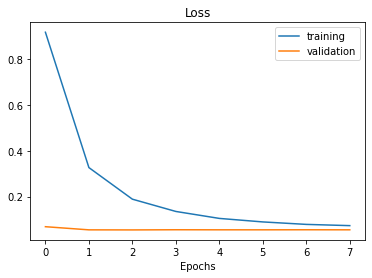

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epochs')

In [51]:
model.save('model.h5')